In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
freq_HS = pd.read_excel('HS_LS_Summary.xlsx',sheet_name="High Spin Modes",header=None)[2]
freq_LS = pd.read_excel('HS_LS_Summary.xlsx',sheet_name="Low Spin Modes",header=None)[2]

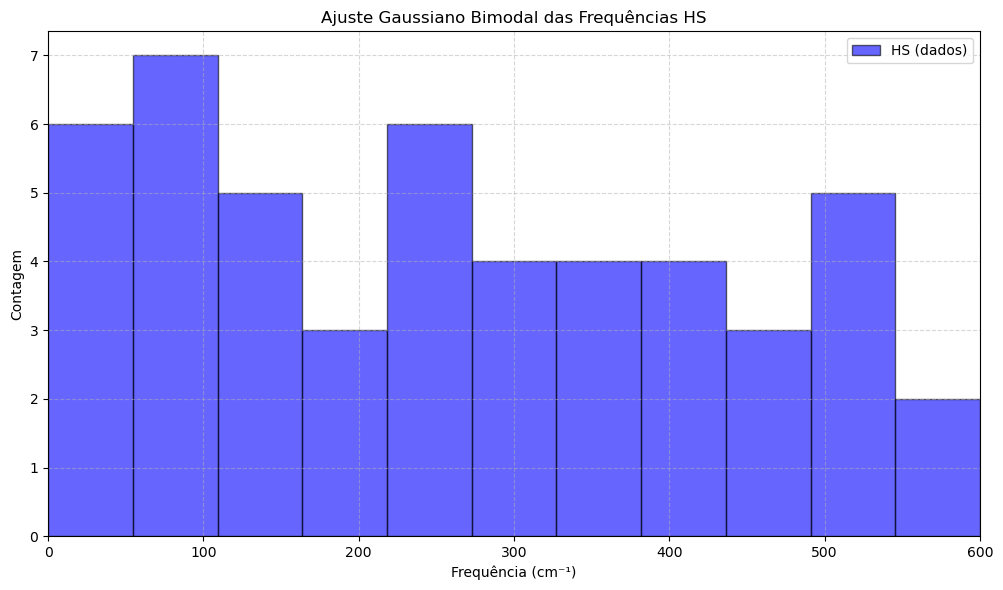

In [21]:
# Histograma (dados brutos para o fit)
range_max = 600
num_bin = 11
counts, bin_edges = np.histogram(freq_HS, bins=num_bin, range=(0,range_max))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


# Plot do histograma e da curva ajustada
plt.figure(figsize=(10, 6))
plt.hist(freq_HS, bins=num_bin, range=(0,range_max), alpha=0.6, label='HS (dados)', color='blue', edgecolor='black')

plt.xlabel('Frequência (cm⁻¹)')
plt.ylabel('Contagem')
plt.title('Ajuste Gaussiano Bimodal das Frequências HS')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0,range_max)
plt.show()

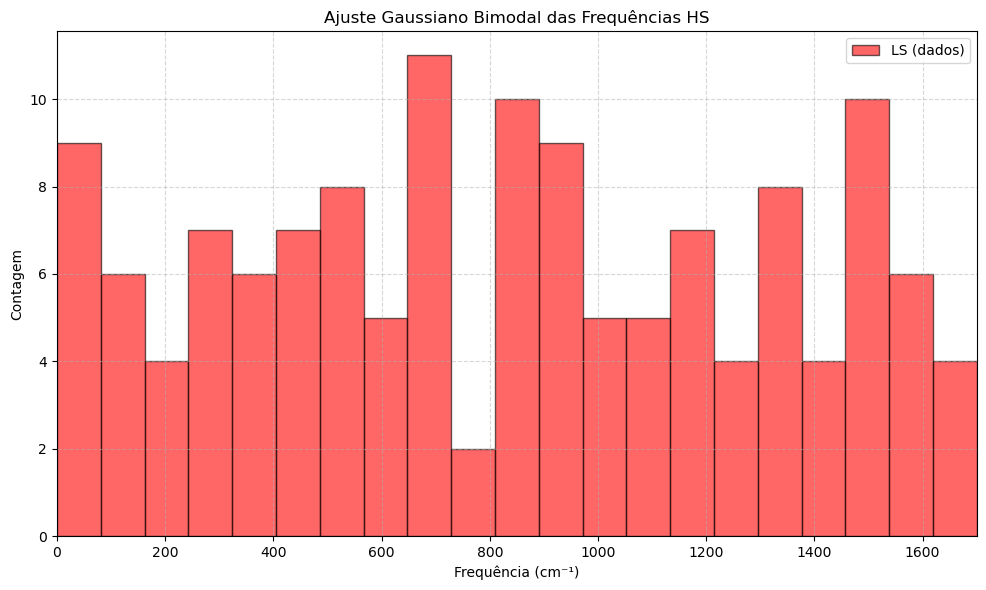

In [24]:
# Histograma (dados brutos para o fit)
range_max = 1700
num_bin = 21
counts, bin_edges = np.histogram(freq_HS, bins=num_bin, range=(0,range_max))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])


# Plot do histograma e da curva ajustada
plt.figure(figsize=(10, 6))
plt.hist(freq_LS, bins=num_bin, range=(0,range_max), alpha=0.6, label='LS (dados)', color='red', edgecolor='black')

plt.xlabel('Frequência (cm⁻¹)')
plt.ylabel('Contagem')
plt.title('Ajuste Gaussiano Bimodal das Frequências HS')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0,1700)
plt.show()

Modo 1: A=15.14, mu=20.00, sigma=280.06
Modo 2: A=57.42, mu=545.34, sigma=34.04
Modo 3: A=15.12, mu=965.21, sigma=168.74


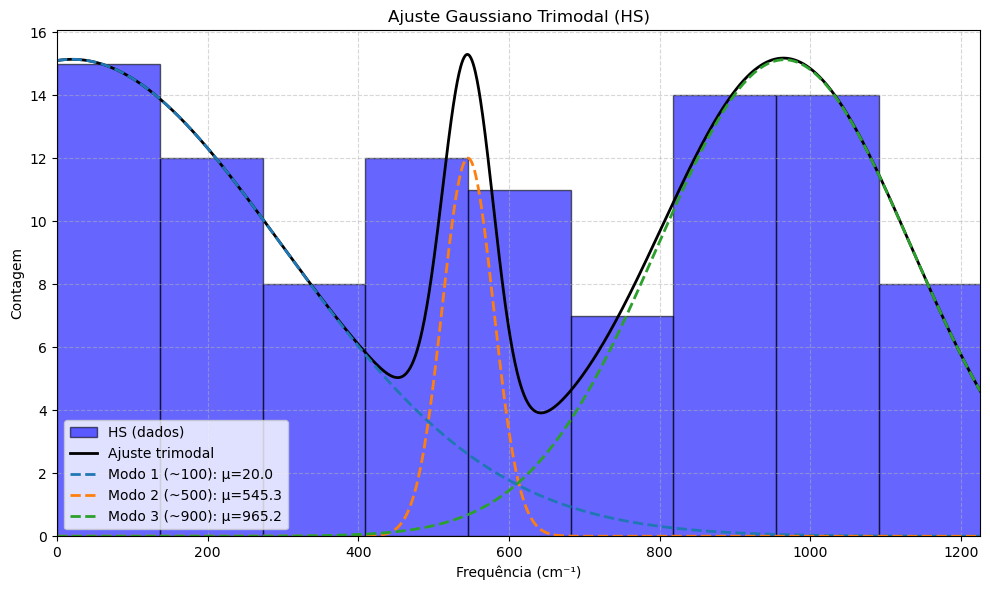

In [502]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- modelo: soma de 3 gaussianas ---
def trimodal(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3):
    g1 = A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    g2 = A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    g3 = A3 * np.exp(-(x - mu3)**2 / (2 * sigma3**2))
    return g1 + g2 + g3

# --- histograma (ex.: HS) ---
range_max = 1500
num_bin = 11
counts, bin_edges = np.histogram(freq_HS, bins=num_bin, range=(0, range_max))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# --- limitar o FIT (não os dados) a [0, 1225] via pesos ---
limite = 1225
sigma_w = np.where((bin_centers >= 0) & (bin_centers <= limite), 1.0, 1e6)  # fora: peso ~0
# dica: se quiser tornar a borda mais suave, use 1e3 em vez de 1e6

# --- chutes iniciais com picos ~100, 500, 900 ---
p0 = [
    max(counts), 100,  60,   # A1, mu1, sigma1
    max(counts)/2, 500, 80,  # A2, mu2, sigma2
    max(counts)/3, 900, 100  # A3, mu3, sigma3
]

# --- bounds (garantem mus na vizinhança dos alvos e <= 1225) ---
# Amplitudes >=0; sigmas entre 1 e 400 (ajuste se necessário)
lower = [0,   20,  1,   0, 350,  1,   0, 750,  1]
upper = [np.inf, 180, 400, np.inf, 650, 400, np.inf, 1100, 400]  # mu3 < 1225

params, cov = curve_fit(
    trimodal, bin_centers, counts, p0=p0,
    sigma=sigma_w, absolute_sigma=True,
    bounds=(lower, upper), maxfev=50000
)

# --- resultados ---
(A1, mu1, s1, A2, mu2, s2, A3, mu3, s3) = params
print(f"Modo 1: A={A1:.2f}, mu={mu1:.2f}, sigma={s1:.2f}")
print(f"Modo 2: A={A2:.2f}, mu={mu2:.2f}, sigma={s2:.2f}")
print(f"Modo 3: A={A3:.2f}, mu={mu3:.2f}, sigma={s3:.2f}")

# --- plot ---
plt.figure(figsize=(10,6))
plt.hist(freq_HS, bins=num_bin, range=(0, range_max), alpha=0.6,
         label='HS (dados)', color='blue', edgecolor='black')

params = np.array([ 15.13727333,  20.        , 280.05603758,  12,
       545.34001027,  34.04009004,  15.12488452, 965.21067546,
       168.73608274])

A2=12
x_fit = np.linspace(0, range_max, 2000)
y_fit = trimodal(x_fit, *params)
plt.plot(x_fit, y_fit, '-', lw=2, label='Ajuste trimodal',color='black')

# componentes
g1 = A1 * np.exp(-(x_fit - mu1)**2 / (2 * s1**2))
g2 = A2 * np.exp(-(x_fit - mu2)**2 / (2 * s2**2))
g3 = A3 * np.exp(-(x_fit - mu3)**2 / (2 * s3**2))
plt.plot(x_fit, g1, '--', lw=2, label=f'Modo 1 (~100): μ={mu1:.1f}')
plt.plot(x_fit, g2, '--', lw=2, label=f'Modo 2 (~500): μ={mu2:.1f}')
plt.plot(x_fit, g3, '--', lw=2, label=f'Modo 3 (~900): μ={mu3:.1f}')

plt.xlim(0, range_max)
plt.xlabel('Frequência (cm⁻¹)')
plt.ylabel('Contagem')
plt.title('Ajuste Gaussiano Trimodal (HS)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0,1225)
plt.show()


In [492]:
params = np.array([ 15.13727333,  20.        , 280.05603758,  57.42351188,
       545.34001027,  34.04009004,  15.12488452, 965.21067546,
       168.73608274])
A1 = 15.13727333
A2 = 57.42351188
A3 = 34.04009004
sigma1 = 280.05603758
sigma2 = 34.04009004
sigma3 =  168.73608274
s1 = 280.05603758
s2 = 34.04009004
s3 = 168.73608274

Modo 1: A=11.96, mu=73.96, sigma=345.27
Modo 2: A=48.60, mu=545.58, sigma=34.36
Modo 3: A=14.66, mu=968.52, sigma=169.59


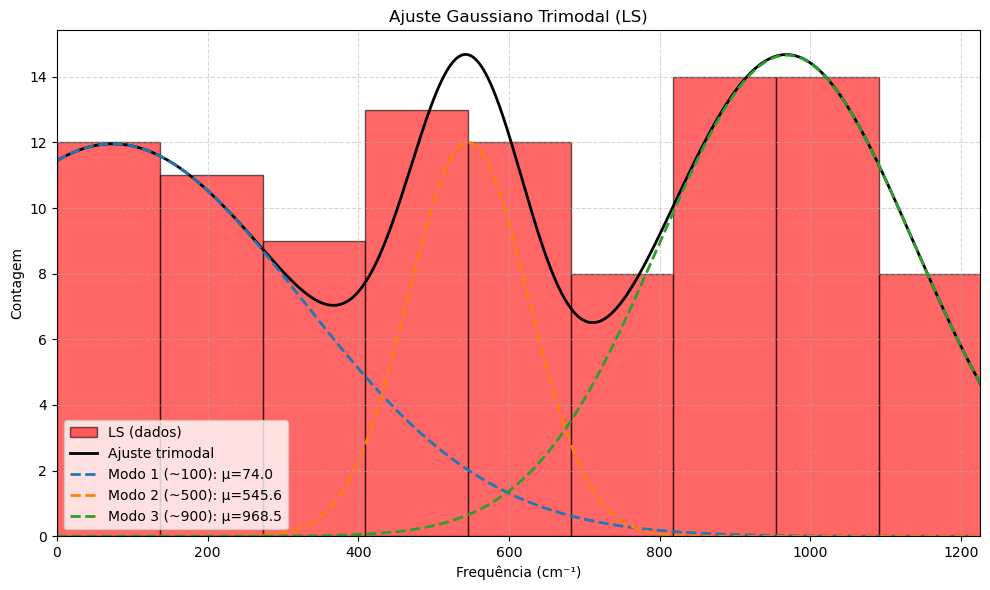

In [504]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- modelo: soma de 3 gaussianas ---
def trimodal(x, A1, mu1, sigma1, A2, mu2, sigma2, A3, mu3, sigma3):
    g1 = A1 * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    g2 = A2 * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    g3 = A3 * np.exp(-(x - mu3)**2 / (2 * sigma3**2))
    return g1 + g2 + g3

# --- histograma (ex.: HS) ---
range_max = 1500
num_bin = 11
counts, bin_edges = np.histogram(freq_LS, bins=num_bin, range=(0, range_max))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# --- limitar o FIT (não os dados) a [0, 1225] via pesos ---
limite = 1225
sigma_w = np.where((bin_centers >= 0) & (bin_centers <= limite), 1.0, 1e6)  # fora: peso ~0
# dica: se quiser tornar a borda mais suave, use 1e3 em vez de 1e6

# --- chutes iniciais com picos ~100, 500, 900 ---
p0 = [
    max(counts), 100,  60,   # A1, mu1, sigma1
    max(counts)/2, 500, 80,  # A2, mu2, sigma2
    max(counts)/3, 900, 100  # A3, mu3, sigma3
]

# --- bounds (garantem mus na vizinhança dos alvos e <= 1225) ---
# Amplitudes >=0; sigmas entre 1 e 400 (ajuste se necessário)
lower = [0,   20,  1,   0, 350,  1,   0, 750,  1]
upper = [np.inf, 180, 400, np.inf, 650, 400, np.inf, 1100, 400]  # mu3 < 1225

params, cov = curve_fit(
    trimodal, bin_centers, counts, p0=p0,
    sigma=sigma_w, absolute_sigma=True,
    bounds=(lower, upper), maxfev=50000
)

# --- resultados ---
(A1, mu1, s1, A2, mu2, s2, A3, mu3, s3) = params
print(f"Modo 1: A={A1:.2f}, mu={mu1:.2f}, sigma={s1:.2f}")
print(f"Modo 2: A={A2:.2f}, mu={mu2:.2f}, sigma={s2:.2f}")
print(f"Modo 3: A={A3:.2f}, mu={mu3:.2f}, sigma={s3:.2f}")

# --- plot ---
plt.figure(figsize=(10,6))
plt.hist(freq_LS, bins=num_bin, range=(0, range_max), alpha=0.6,
         label='LS (dados)', color='red', edgecolor='black')

params = np.array([ 11.95532697,  73.96106421, 250,  12,
       545.5808432 ,  80,  14.65658433, 968.52208078,
       169.58627607])
A1 = 11.95532697
A2 = 12
A3 = 14.65658433
sigma1 = 250
sigma2 = 80
sigma3 = 169.58627607
s1 = 250
s2 = 80
s3 = 169.58627607
x_fit = np.linspace(0, range_max, 2000)
y_fit = trimodal(x_fit, *params)
plt.plot(x_fit, y_fit, '-', lw=2, label='Ajuste trimodal',color='black')

# componentes
g1 = A1 * np.exp(-(x_fit - mu1)**2 / (2 * s1**2))
g2 = A2 * np.exp(-(x_fit - mu2)**2 / (2 * s2**2))
g3 = A3 * np.exp(-(x_fit - mu3)**2 / (2 * s3**2))
plt.plot(x_fit, g1, '--', lw=2, label=f'Modo 1 (~100): μ={mu1:.1f}')
plt.plot(x_fit, g2, '--', lw=2, label=f'Modo 2 (~500): μ={mu2:.1f}')
plt.plot(x_fit, g3, '--', lw=2, label=f'Modo 3 (~900): μ={mu3:.1f}')

plt.xlim(0, range_max)
plt.xlabel('Frequência (cm⁻¹)')
plt.ylabel('Contagem')
plt.title('Ajuste Gaussiano Trimodal (LS)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xlim(0,1225)
plt.show()
